# Ensemble Techniques - Project Parkinson's Disease assignment solutions Residency 3 
##### Setting environment and loading neccesary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport

# Data preparation
### Loading Data

A sample of 10 observations is given below.

In [2]:
PSON=pd.read_csv('parkinsons.data',index_col=0)
PSON.sample(10)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S24_5,128.451,150.449,75.632,0.01551,0.00012,0.00905,0.00909,0.02716,0.06170,0.584,...,0.09669,0.11843,15.060,1,0.639808,0.643327,-4.202730,0.310163,2.638279,0.356881
phon_R01_S32_3,120.289,128.143,100.209,0.00492,0.00004,0.00269,0.00238,0.00808,0.01412,0.125,...,0.02110,0.01610,23.949,1,0.467160,0.724045,-6.135296,0.203630,2.539724,0.169923
phon_R01_S32_2,120.078,126.632,105.667,0.00270,0.00002,0.00116,0.00135,0.00349,0.01022,0.090,...,0.01428,0.00487,26.369,1,0.491345,0.718839,-5.892061,0.195976,2.108873,0.183572
phon_R01_S04_6,168.778,232.181,75.603,0.00718,0.00004,0.00284,0.00387,0.00853,0.03327,0.348,...,0.04322,0.02919,20.376,1,0.631099,0.605417,-2.931070,0.434326,3.007463,0.430788
phon_R01_S22_2,148.272,164.989,142.299,0.00459,0.00003,0.00250,0.00256,0.00750,0.04190,0.383,...,0.07150,0.01914,18.780,1,0.454444,0.734504,-5.952058,0.087840,2.344336,0.186489
phon_R01_S22_1,151.955,163.335,147.226,0.00419,0.00003,0.00224,0.00227,0.00672,0.07959,0.772,...,0.13262,0.01658,19.664,1,0.501037,0.714360,-6.411497,0.207156,2.344876,0.134120
phon_R01_S35_4,202.632,565.740,177.258,0.01627,0.00008,0.00919,0.00963,0.02756,0.07170,0.833,...,0.10546,0.07889,14.989,1,0.427627,0.775708,-4.892495,0.262281,2.910213,0.270173
phon_R01_S17_6,228.969,239.541,113.201,0.00238,0.00001,0.00136,0.00140,0.00408,0.01745,0.154,...,0.02827,0.00420,24.547,0,0.305429,0.681811,-7.314237,0.006274,2.118596,0.091546
phon_R01_S39_3,115.322,135.738,107.802,0.00619,0.00005,0.00352,0.00329,0.01057,0.03273,0.325,...,0.04933,0.02810,19.388,1,0.577802,0.684373,-5.283009,0.226528,2.442906,0.238281


Looking at the profile of Data .

Checking for missing values,data types and values like special chraracters.

Status - Health status of the subject   (one) = Parkinson's ,(zero) = Healthy

In [3]:
PSON.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, phon_R01_S01_1 to phon_R01_S50_6
Data columns (total 23 columns):
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null float64
D2               

Other than name all the attributes are in desired format(data type).There are no missing values and special characters of any kind in data.

In [4]:
PSON.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


# EDA

### The visualization is with respect to the target variable 'status':

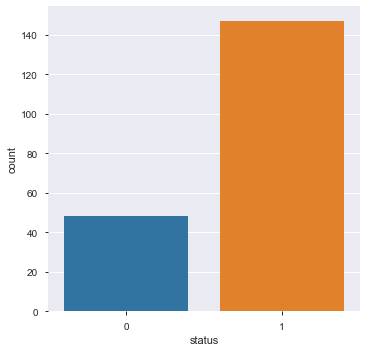

In [5]:
sns.catplot(x='status',kind='count',data=PSON)

The barplot clearly shows that most of the observations given in the dataset have a status of 1 i.e most of the people's represented in the dataset have been prone to parkinsons disease. This could also create a bias in the model.

C:\Users\anku\Anaconda3\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
C:\Users\anku\Anaconda3\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


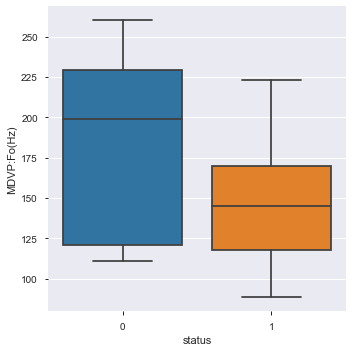

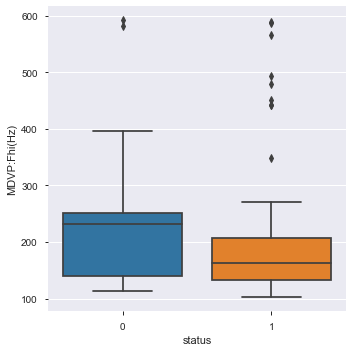

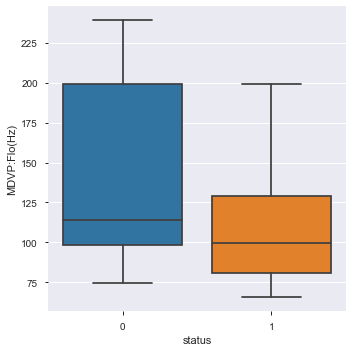

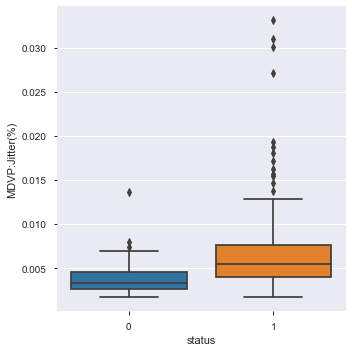

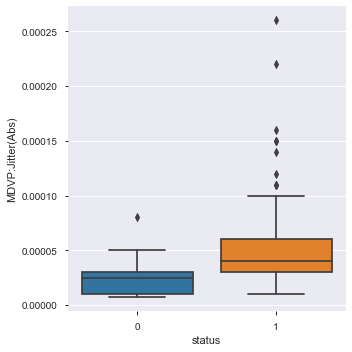

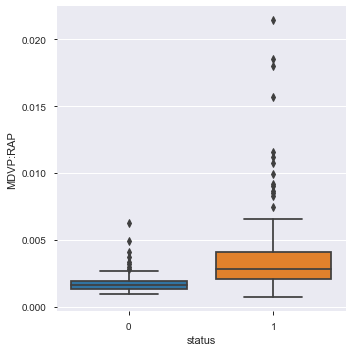

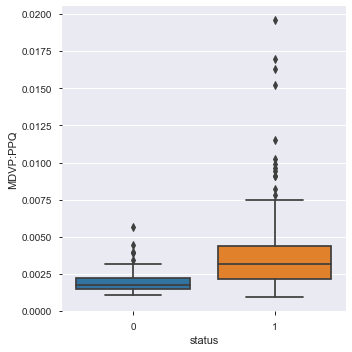

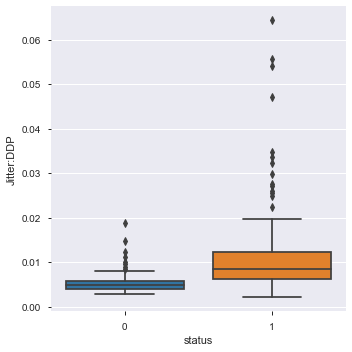

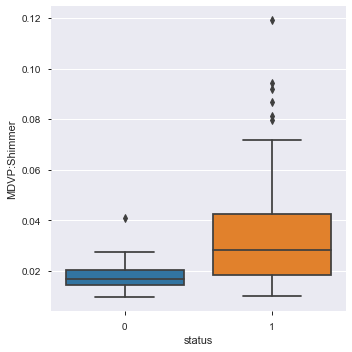

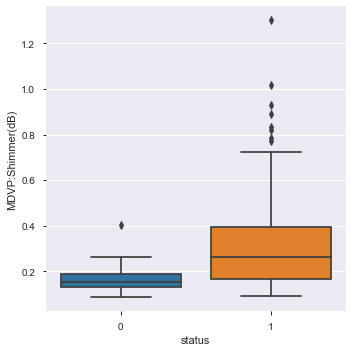

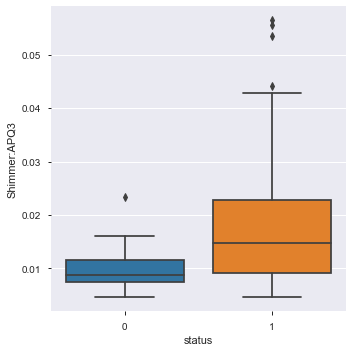

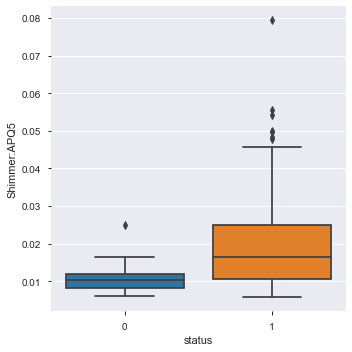

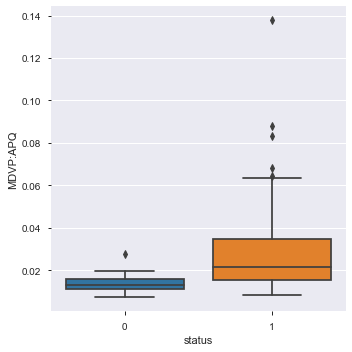

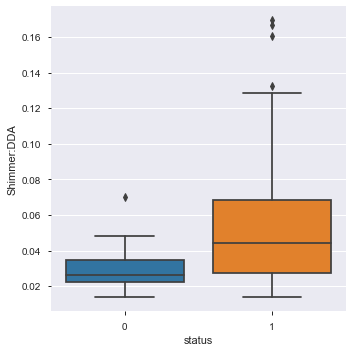

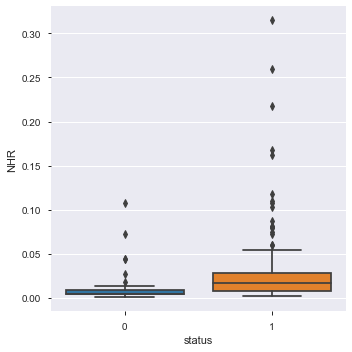

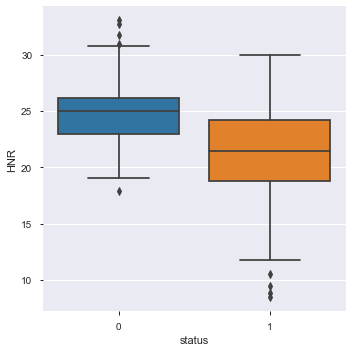

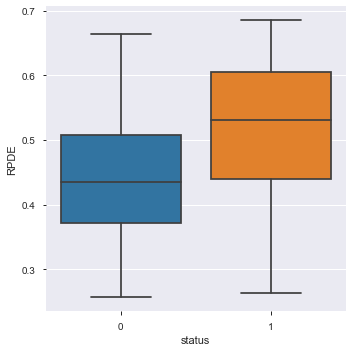

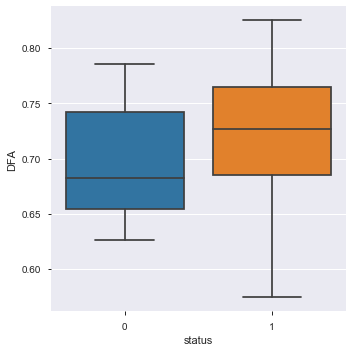

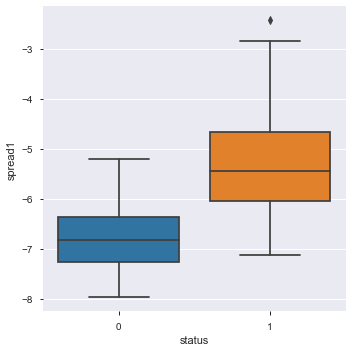

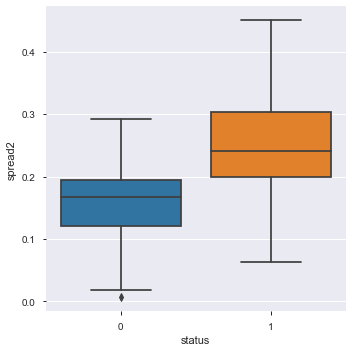

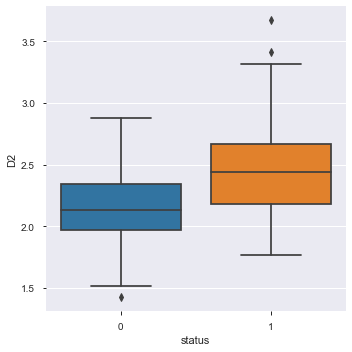

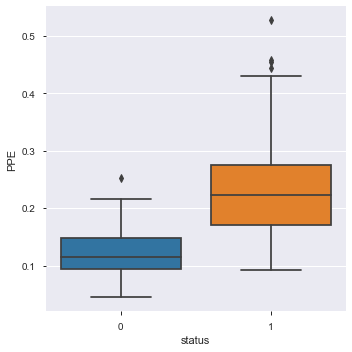

In [6]:
for i in PSON:
    if i != 'status':
        sns.catplot(x='status',y=i,kind='box',data=PSON)

The boxplot shown below helps in identifying the difference in values with respect to the 'status' of the patient and also shows that there are outliers in the many columns.We will only perform outlier treatment in some of the colums for study case and where it is very high skewness.

# Univariate Analysis and outlier treatment for some of the columns

In [7]:
PSON.kurtosis(numeric_only  = True)

MDVP:Fo(Hz)         -0.627898
MDVP:Fhi(Hz)         7.627241
MDVP:Flo(Hz)         0.654615
MDVP:Jitter(%)      12.030939
MDVP:Jitter(Abs)    10.869043
MDVP:RAP            14.213798
MDVP:PPQ            11.963922
Jitter:DDP          14.224762
MDVP:Shimmer         3.238308
MDVP:Shimmer(dB)     5.128193
Shimmer:APQ3         2.720152
Shimmer:APQ5         3.874210
MDVP:APQ            11.163288
Shimmer:DDA          2.720661
NHR                 21.994974
HNR                  0.616036
status              -0.595518
RPDE                -0.921781
DFA                 -0.686152
spread1             -0.050199
spread2             -0.083023
D2                   0.220334
PPE                  0.528335
dtype: float64

Kurtosis with positive values indicates that those attributes have more data points around the tail

In [8]:
PSON.skew(numeric_only  = True)

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

The features with positive values of skew indicates data is skewed towards right in those features.
The negative values of skew indicates data is skewed towards left in those features.

### Maximum vocal fundamental frequency MDVP:Fhi (Hz)

In [9]:
print("The maximum vocal fundamental frequency of a person is {:.2f} and 99% of the people have a Fhi of {:.2f}".format(PSON['MDVP:Fhi(Hz)'].mean(),PSON['MDVP:Fhi(Hz)'].quantile(0.90)))
      

The maximum vocal fundamental frequency of a person is 197.10 and 99% of the people have a Fhi of 261.00


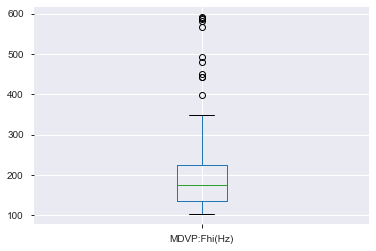

In [10]:
PSON['MDVP:Fhi(Hz)'].plot(kind='box')

Skewness :  2.542145997588398
Kurtosis :  7.627241211631889
AxesSubplot(0.125,0.125;0.775x0.755)


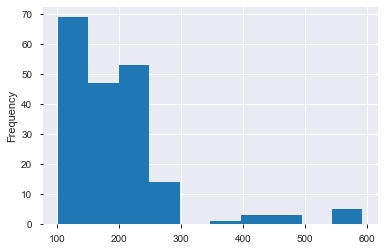

In [11]:
print('Skewness : ',PSON['MDVP:Fhi(Hz)'].skew())
print('Kurtosis : ',PSON['MDVP:Fhi(Hz)'].kurtosis())
print(PSON['MDVP:Fhi(Hz)'].plot.hist(bins=10))

The value is positive hence the data is skewed towards right side

The value is postive hence more data points are around the tail

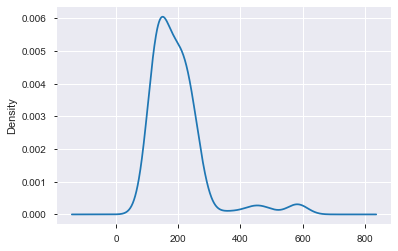

In [12]:
PSON['MDVP:Fhi(Hz)'].plot.kde()

#### outlier treatment

In [13]:
q3 = PSON['MDVP:Fhi(Hz)'].quantile(0.75)
q1 = PSON['MDVP:Fhi(Hz)'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 313.5485
outliers_below : 45.51950000000002


In [14]:
print(PSON['MDVP:Fhi(Hz)'].loc[PSON['MDVP:Fhi(Hz)']>outliers_above].count())
print(PSON['MDVP:Fhi(Hz)'].loc[PSON['MDVP:Fhi(Hz)']<outliers_below].count())
print(PSON['MDVP:Fhi(Hz)'].loc[PSON['MDVP:Fhi(Hz)']>outliers_above])

12
0
name
phon_R01_S04_5    349.259
phon_R01_S19_2    588.518
phon_R01_S24_6    586.567
phon_R01_S27_1    492.892
phon_R01_S27_2    442.557
phon_R01_S27_3    450.247
phon_R01_S27_4    442.824
phon_R01_S27_6    479.697
phon_R01_S35_4    565.740
phon_R01_S49_4    592.030
phon_R01_S49_5    581.289
phon_R01_S50_5    396.961
Name: MDVP:Fhi(Hz), dtype: float64


Replacing the outlier with medians as median is robust.

In [15]:
median_val = PSON['MDVP:Fhi(Hz)'].loc[PSON['MDVP:Fhi(Hz)']<=outliers_above].median()
PSON['MDVP:Fhi(Hz)'] = PSON['MDVP:Fhi(Hz)'].mask(PSON['MDVP:Fhi(Hz)']>outliers_above,median_val)
print(PSON['MDVP:Fhi(Hz)'].head(20))

name
phon_R01_S01_1    157.302
phon_R01_S01_2    148.650
phon_R01_S01_3    131.111
phon_R01_S01_4    137.871
phon_R01_S01_5    141.781
phon_R01_S01_6    131.162
phon_R01_S02_1    137.244
phon_R01_S02_2    113.840
phon_R01_S02_3    132.068
phon_R01_S02_4    120.103
phon_R01_S02_5    112.240
phon_R01_S02_6    115.871
phon_R01_S04_1    159.866
phon_R01_S04_2    179.139
phon_R01_S04_3    163.305
phon_R01_S04_4    217.455
phon_R01_S04_5    164.989
phon_R01_S04_6    232.181
phon_R01_S05_1    175.829
phon_R01_S05_2    189.398
Name: MDVP:Fhi(Hz), dtype: float64


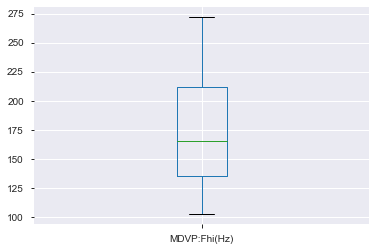

In [16]:
PSON['MDVP:Fhi(Hz)'].plot(kind='box')

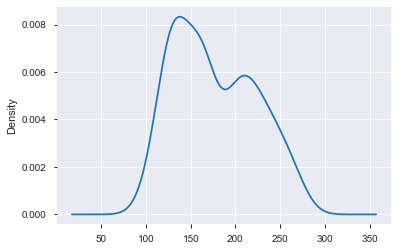

In [17]:
PSON['MDVP:Fhi(Hz)'].plot.kde()

Skewness :  0.3465404758393161
Kurtosis :  -1.0412839516180208


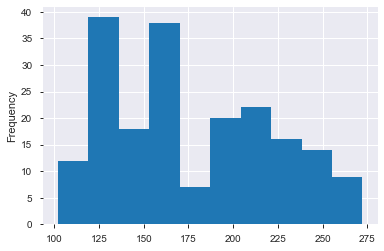

In [18]:
print('Skewness : ',PSON['MDVP:Fhi(Hz)'].skew())
print('Kurtosis : ',PSON['MDVP:Fhi(Hz)'].kurtosis())
PSON['MDVP:Fhi(Hz)'].plot.hist()

 After outlier treatment kurtosis indicates that less number of data points are around the tail 

# Minimum vocal fundamental frequency MDVP:Flo (Hz)

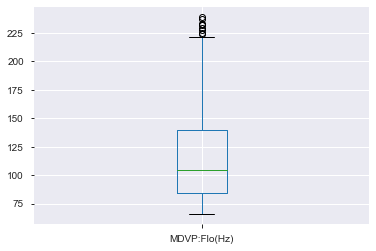

In [19]:
PSON['MDVP:Flo(Hz)'].plot(kind='box')

Skewness :  1.217350448627808
Kurtosis :  0.6546145211395396
AxesSubplot(0.125,0.125;0.775x0.755)


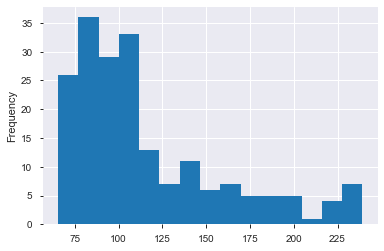

In [20]:
print('Skewness : ',PSON['MDVP:Flo(Hz)'].skew())
print('Kurtosis : ',PSON['MDVP:Flo(Hz)'].kurtosis())
print(PSON['MDVP:Flo(Hz)'].plot.hist(bins=15))

The value is positive hence the data is skewed towards right side

The value is postive hence the more data points are around the tail

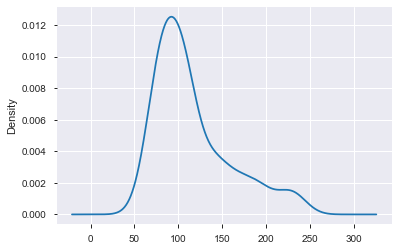

In [21]:
PSON['MDVP:Flo(Hz)'].plot.kde()

outlier treatment

In [22]:
q3 = PSON['MDVP:Flo(Hz)'].quantile(0.75)
q1 = PSON['MDVP:Flo(Hz)'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 195.74600000000004
outliers_below : 28.563499999999976


In [23]:
print(PSON['MDVP:Flo(Hz)'].loc[PSON['MDVP:Flo(Hz)']>outliers_above].count())
print(PSON['MDVP:Flo(Hz)'].loc[PSON['MDVP:Flo(Hz)']<outliers_below].count())
print(PSON['MDVP:Flo(Hz)'].loc[PSON['MDVP:Flo(Hz)']>outliers_above])

15
0
name
phon_R01_S07_4    197.079
phon_R01_S07_5    196.160
phon_R01_S10_1    225.227
phon_R01_S10_2    232.483
phon_R01_S10_3    232.435
phon_R01_S10_4    227.911
phon_R01_S10_5    231.848
phon_R01_S17_3    205.495
phon_R01_S17_4    223.634
phon_R01_S17_5    221.156
phon_R01_S26_3    199.020
phon_R01_S42_2    229.256
phon_R01_S42_3    237.303
phon_R01_S42_5    219.783
phon_R01_S42_6    239.170
Name: MDVP:Flo(Hz), dtype: float64


AxesSubplot(0.125,0.125;0.775x0.755)


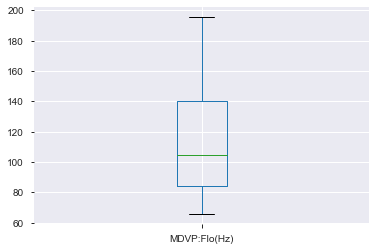

In [24]:
max_val = PSON['MDVP:Flo(Hz)'].loc[PSON['MDVP:Flo(Hz)']<=outliers_above].max()
PSON['MDVP:Flo(Hz)'] = PSON['MDVP:Flo(Hz)'].mask(PSON['MDVP:Flo(Hz)']>outliers_above,max_val)
print(PSON['MDVP:Flo(Hz)'].plot(kind='box'))

Skewness :  0.9105008789129816
Kurtosis :  -0.3380621656813876
AxesSubplot(0.125,0.125;0.775x0.755)


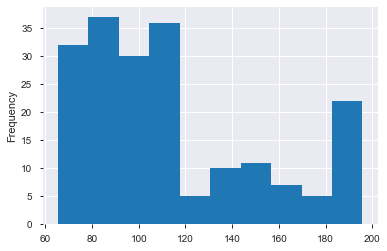

In [25]:
print('Skewness : ',PSON['MDVP:Flo(Hz)'].skew())
print('Kurtosis : ',PSON['MDVP:Flo(Hz)'].kurtosis())
print(PSON['MDVP:Flo(Hz)'].plot.hist())

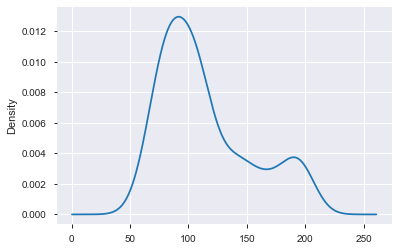

In [26]:
PSON['MDVP:Flo(Hz)'].plot.kde()

After outlier treatment kurtosis indicates less number of data points around the tail

## Several measures of variation in fundamental frequency
#### MDVP:Jitter(%)

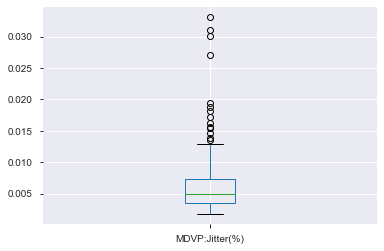

In [27]:
PSON['MDVP:Jitter(%)'].plot(kind='box')

In [28]:
print("The minimum vocal fundamental frequency of a person is {:.2f} and 99% of the people have a Jitter of {:.2f}".format(PSON['MDVP:Jitter(%)'].mean(),PSON['MDVP:Jitter(%)'].quantile(0.90)))

The minimum vocal fundamental frequency of a person is 0.01 and 99% of the people have a Jitter of 0.01


Skewness :  3.0849462014441817
Kurtosis :  12.030939276179508
AxesSubplot(0.125,0.125;0.775x0.755)


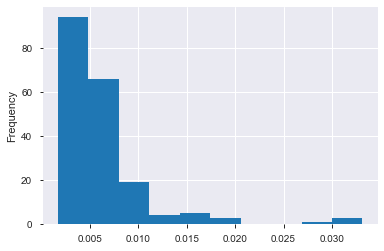

In [29]:
print('Skewness : ',PSON['MDVP:Jitter(%)'].skew())
print('Kurtosis : ',PSON['MDVP:Jitter(%)'].kurtosis())
print(PSON['MDVP:Jitter(%)'].plot.hist())

The value is positive hence the data is skewed towards right side

The value is positive hence more data points around the tail

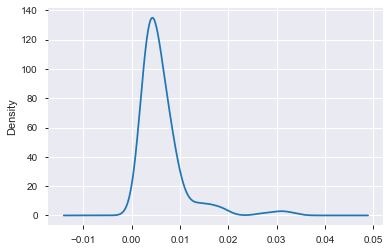

In [30]:
PSON['MDVP:Jitter(%)'].plot.kde()

#### Outlier Treatment

In [31]:
q3 = PSON['MDVP:Jitter(%)'].quantile(0.75)
q1 = PSON['MDVP:Jitter(%)'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 0.01127
outliers_below : -0.0004450000000000001


In [32]:
print(PSON['MDVP:Jitter(%)'].loc[PSON['MDVP:Jitter(%)']>outliers_above].count())
print(PSON['MDVP:Jitter(%)'].loc[PSON['MDVP:Jitter(%)']<outliers_below].count())
print(PSON['MDVP:Jitter(%)'].loc[PSON['MDVP:Jitter(%)']>outliers_above])

16
0
name
phon_R01_S01_5    0.01284
phon_R01_S24_1    0.01280
phon_R01_S24_2    0.01378
phon_R01_S24_3    0.01936
phon_R01_S24_4    0.03316
phon_R01_S24_5    0.01551
phon_R01_S24_6    0.03011
phon_R01_S35_1    0.01568
phon_R01_S35_2    0.01466
phon_R01_S35_3    0.01719
phon_R01_S35_4    0.01627
phon_R01_S35_5    0.01872
phon_R01_S35_6    0.03107
phon_R01_S35_7    0.02714
phon_R01_S37_5    0.01813
phon_R01_S50_4    0.01360
Name: MDVP:Jitter(%), dtype: float64


AxesSubplot(0.125,0.125;0.775x0.755)


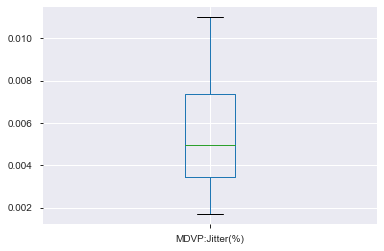

In [33]:
max_val = PSON['MDVP:Jitter(%)'].loc[PSON['MDVP:Jitter(%)']<=outliers_above].max()
PSON['MDVP:Jitter(%)'] = PSON['MDVP:Jitter(%)'].mask(PSON['MDVP:Jitter(%)']>outliers_above,max_val)
print(PSON['MDVP:Jitter(%)'].plot(kind='box'))

Skewness :  0.7135316854634219
Kurtosis :  -0.45799448113050856


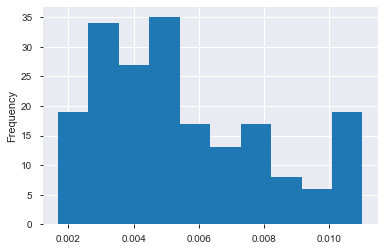

In [34]:
print('Skewness : ',PSON['MDVP:Jitter(%)'].skew())
print('Kurtosis : ',PSON['MDVP:Jitter(%)'].kurtosis())
PSON['MDVP:Jitter(%)'].plot.hist()

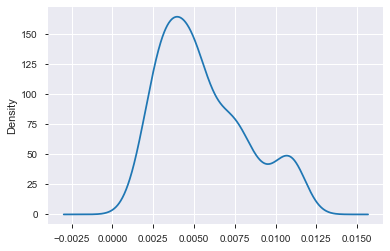

In [35]:
PSON['MDVP:Jitter(%)'].plot.kde()

After outlier treatment kurtosis indicates less number of data points around the tail

#### MDVP:Jitter(Abs)

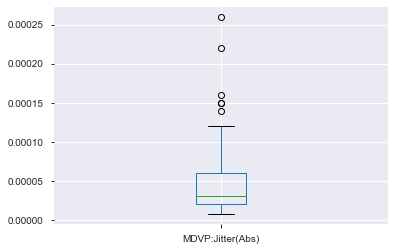

In [36]:
PSON['MDVP:Jitter(Abs)'].plot(kind='box')

Skewness :  2.6490714165257274
kurtosis :  10.869042517763667
AxesSubplot(0.125,0.125;0.775x0.755)


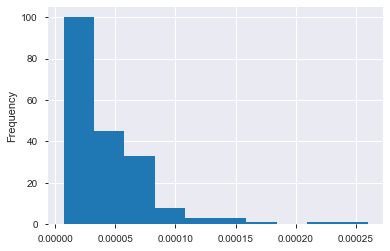

In [37]:
print('Skewness : ',PSON['MDVP:Jitter(Abs)'].skew())
print('kurtosis : ',PSON['MDVP:Jitter(Abs)'].kurtosis())
print(PSON['MDVP:Jitter(Abs)'].plot.hist())

The value is positive hence the data is skewed towards right side

The value is positive hence more data points are around the tail

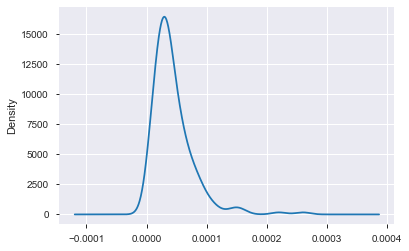

In [38]:
PSON['MDVP:Jitter(Abs)'].plot.kde()

#### Outlier Treatment

In [39]:
q3 = PSON['MDVP:Jitter(Abs)'].quantile(0.75)
q1 = PSON['MDVP:Jitter(Abs)'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 9.999999999999999e-05
outliers_below : -1.9999999999999995e-05


In [40]:
print(PSON['MDVP:Jitter(Abs)'].loc[PSON['MDVP:Jitter(Abs)']>outliers_above].count())
print(PSON['MDVP:Jitter(Abs)'].loc[PSON['MDVP:Jitter(Abs)']<outliers_below].count())

12
0


AxesSubplot(0.125,0.125;0.775x0.755)


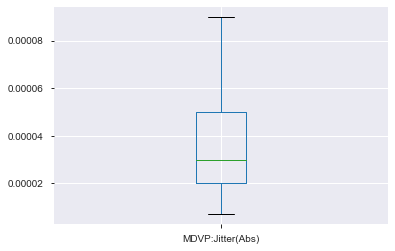

In [41]:
mean_val = PSON['MDVP:Jitter(Abs)'].loc[PSON['MDVP:Jitter(Abs)']<=outliers_above].mean()
PSON['MDVP:Jitter(Abs)'] = PSON['MDVP:Jitter(Abs)'].mask(PSON['MDVP:Jitter(Abs)']>outliers_above,mean_val)
print(PSON['MDVP:Jitter(Abs)'].plot(kind='box'))

skewness :  0.7300925097869511
Kurtosis :  0.008361144000160525


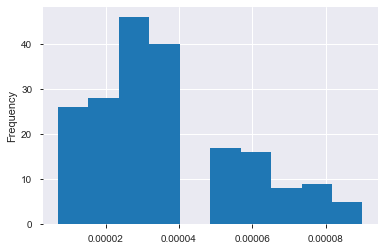

In [42]:
print('skewness : ',PSON['MDVP:Jitter(Abs)'].skew())
print('Kurtosis : ',PSON['MDVP:Jitter(Abs)'].kurtosis())
PSON['MDVP:Jitter(Abs)'].plot.hist()

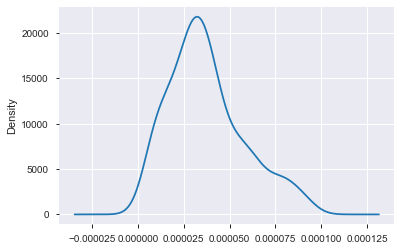

In [43]:
PSON['MDVP:Jitter(Abs)'].plot.kde()

After outlier treatment kurtosis indicates less number of data points around the tail

### MDVP:RAP

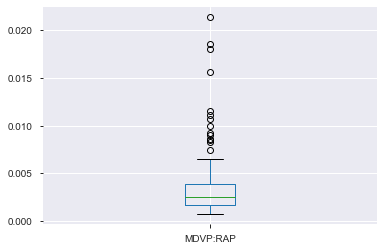

In [44]:
PSON['MDVP:RAP'].plot(kind='box')

Skewness :  3.360708450480554
Kurtosis :  14.213797721522418
AxesSubplot(0.125,0.125;0.775x0.755)


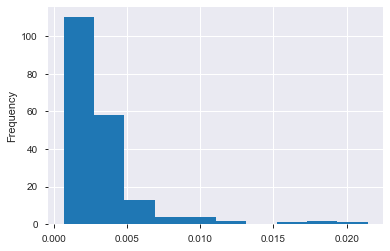

In [45]:
print('Skewness : ',PSON['MDVP:RAP'].skew())
print('Kurtosis : ',PSON['MDVP:RAP'].kurtosis())
print(PSON['MDVP:RAP'].plot.hist())

The value is positive hence the data is skewed towards right side

The value is positive hence more data points are around the tail

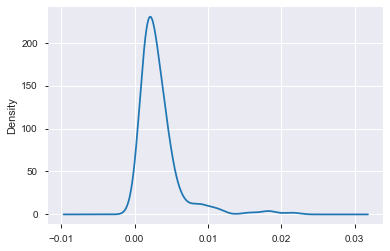

In [46]:
PSON['MDVP:RAP'].plot.kde()

#### Outlier Treatment

In [47]:
q3 = PSON['MDVP:RAP'].quantile(0.75)
q1 = PSON['MDVP:RAP'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 0.00601
outliers_below : -0.0005149999999999996


In [48]:
print(PSON['MDVP:RAP'].loc[PSON['MDVP:RAP']>outliers_above].count())
print(PSON['MDVP:RAP'].loc[PSON['MDVP:RAP']<outliers_below].count())

18
0


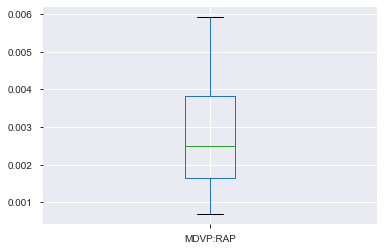

In [49]:
max_val = PSON['MDVP:RAP'].loc[PSON['MDVP:RAP']<=outliers_above].max()
PSON['MDVP:RAP'] = PSON['MDVP:RAP'].mask(PSON['MDVP:RAP']>outliers_above,max_val)
PSON['MDVP:RAP'].plot(kind='box')

Skewness :  0.7370769342317647
Kurtosis :  -0.5062984793572727
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


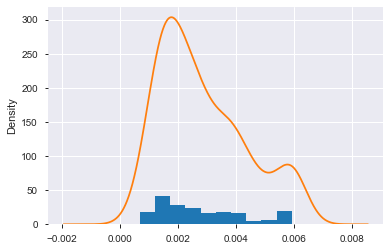

In [50]:
print('Skewness : ',PSON['MDVP:RAP'].skew())
print('Kurtosis : ',PSON['MDVP:RAP'].kurtosis())
print(PSON['MDVP:RAP'].plot.hist())
print(PSON['MDVP:RAP'].plot.kde())

### MDVP:PPQ

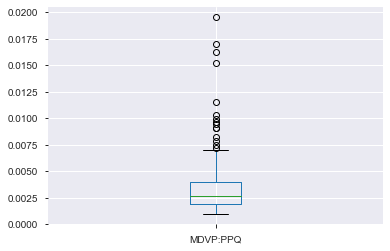

In [51]:
PSON['MDVP:PPQ'].plot(kind='box')

Skewness :  3.073892457888517
Kurtosis :  11.963922120220282
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


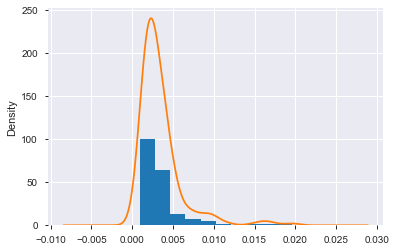

In [52]:
print('Skewness : ',PSON['MDVP:PPQ'].skew())
print('Kurtosis : ',PSON['MDVP:PPQ'].kurtosis())
print(PSON['MDVP:PPQ'].plot.hist())
print(PSON['MDVP:PPQ'].plot.kde())

The value is positive hence the data is skewed towards right side

The value is positive hence more data points are around the tail

#### Outlier Treatment

In [53]:
q3 = PSON['MDVP:PPQ'].quantile(0.75)
q1 = PSON['MDVP:PPQ'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 0.00605
outliers_below : -0.00023499999999999997


In [54]:
print(PSON['MDVP:PPQ'].loc[PSON['MDVP:PPQ']>outliers_above].count())
print(PSON['MDVP:PPQ'].loc[PSON['MDVP:PPQ']<outliers_below].count())

19
0


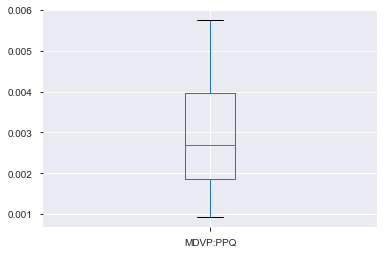

In [55]:
max_val = PSON['MDVP:PPQ'].loc[PSON['MDVP:PPQ']<=outliers_above].max()
PSON['MDVP:PPQ'] = PSON['MDVP:PPQ'].mask(PSON['MDVP:PPQ']>outliers_above,max_val)
PSON['MDVP:PPQ'].plot(kind='box')

Skewness :  0.6406137677940903
Kurtosis :  -0.6941626966478127
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


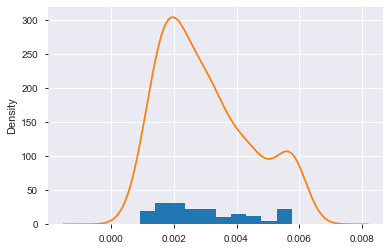

In [56]:
print('Skewness : ',PSON['MDVP:PPQ'].skew())
print('Kurtosis : ',PSON['MDVP:PPQ'].kurtosis())
print(PSON['MDVP:PPQ'].plot.hist())
print(PSON['MDVP:PPQ'].plot.kde())

After outlier treatment kurtosis indicates less number of data points around the tail

### Jitter:DDP

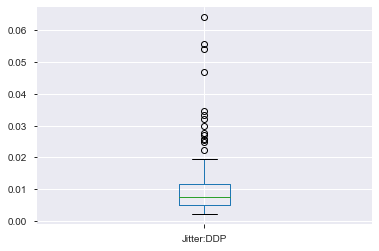

In [57]:
PSON['Jitter:DDP'].plot(kind='box')

Skewness :  3.3620584478857203
Kurtosis :  14.224761911379424
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


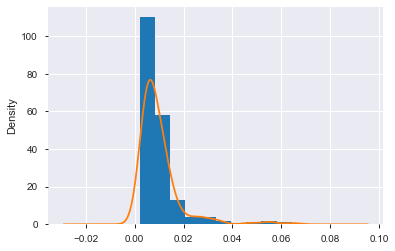

In [58]:
print('Skewness : ',PSON['Jitter:DDP'].skew())
print('Kurtosis : ',PSON['Jitter:DDP'].kurtosis())
print(PSON['Jitter:DDP'].plot.hist())
print(PSON['Jitter:DDP'].plot.kde())

The value is positive hence the data is skewed towards right side

The value is postive hence more data points are around the tail

#### Outlier Treatment

In [59]:
q3 = PSON['Jitter:DDP'].quantile(0.75)
q1 = PSON['Jitter:DDP'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 0.018025
outliers_below : -0.001535


In [60]:
print(PSON['Jitter:DDP'].loc[PSON['Jitter:DDP']>outliers_above].count())
print(PSON['Jitter:DDP'].loc[PSON['Jitter:DDP']<outliers_below].count())

18
0


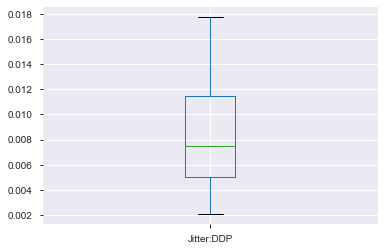

In [61]:
max_val = PSON['Jitter:DDP'].loc[PSON['Jitter:DDP']<=outliers_above].max()
PSON['Jitter:DDP'] = PSON['Jitter:DDP'].mask(PSON['Jitter:DDP']>outliers_above,max_val)
PSON['Jitter:DDP'].plot(kind='box')

Skewness :  0.7360596525004133
Kurtosis :  -0.5082945859294927
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


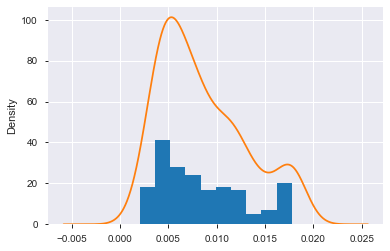

In [62]:
print('Skewness : ',PSON['Jitter:DDP'].skew())
print('Kurtosis : ',PSON['Jitter:DDP'].kurtosis())
print(PSON['Jitter:DDP'].plot.hist())
print(PSON['Jitter:DDP'].plot.kde())

After outlier treatment kurtosis indicates less number of data points around the tail

## Three nonlinear measures of fundamental frequency variation
### Spread1

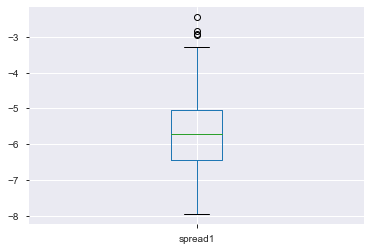

In [63]:
PSON['spread1'].plot(kind='box')

Skewness :  0.4321389320131796
Kurtosis :  -0.05019918161280801
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


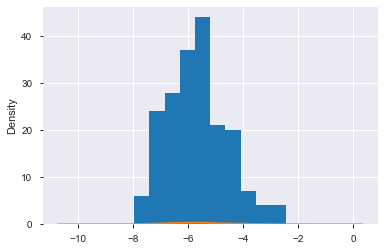

In [64]:
print('Skewness : ',PSON['spread1'].skew())
print('Kurtosis : ',PSON['spread1'].kurtosis())
print(PSON['spread1'].plot.hist())
print(PSON['spread1'].plot.kde())

### Spread2

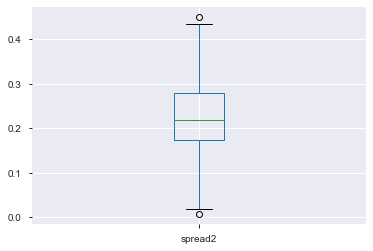

In [65]:
PSON['spread2'].plot(kind='box')

Skewness :  0.14443048549278412
Kurtosis :  -0.08302289327680024
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


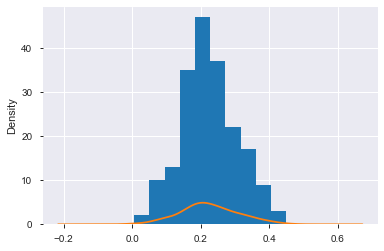

In [66]:
print('Skewness : ',PSON['spread2'].skew())
print('Kurtosis : ',PSON['spread2'].kurtosis())
print(PSON['spread2'].plot.hist())
print(PSON['spread2'].plot.kde())

## Bivariate Analysis

In [67]:
PSON.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.880171,0.561371,-0.250583,-0.547372,-0.172840,-0.273418,-0.172984,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.880171,1.000000,0.387279,-0.147803,-0.410490,-0.087894,-0.146787,-0.087928,-0.036509,-0.014447,...,-0.035837,0.014067,-0.042683,-0.312048,-0.231007,-0.427178,-0.286953,-0.166172,0.224457,-0.244056
MDVP:Flo(Hz),0.561371,0.387279,1.000000,-0.323256,-0.431424,-0.269970,-0.300313,-0.270064,-0.126839,-0.100045,...,-0.137664,-0.098493,0.214699,-0.338143,-0.402776,0.009791,-0.372640,-0.207804,-0.089108,-0.317729
MDVP:Jitter(%),-0.250583,-0.147803,-0.323256,1.000000,0.764780,0.974066,0.972213,0.974055,0.680992,0.697224,...,0.660841,0.635809,-0.725859,0.374562,0.425158,0.217313,0.758064,0.423388,0.412113,0.769584
MDVP:Jitter(Abs),-0.547372,-0.410490,-0.431424,0.764780,1.000000,0.709219,0.774249,0.709354,0.427913,0.430953,...,0.402661,0.225299,-0.456776,0.395158,0.420964,0.408744,0.660562,0.407151,0.179888,0.659667
MDVP:RAP,-0.172840,-0.087894,-0.269970,0.974066,0.709219,1.000000,0.949262,0.999999,0.673089,0.686222,...,0.661612,0.633377,-0.733481,0.361767,0.391964,0.182443,0.694319,0.326097,0.413525,0.700520
MDVP:PPQ,-0.273418,-0.146787,-0.300313,0.972213,0.774249,0.949262,1.000000,0.949279,0.688001,0.699980,...,0.667111,0.596246,-0.738289,0.386393,0.430089,0.300069,0.774455,0.415703,0.374005,0.802770
Jitter:DDP,-0.172984,-0.087928,-0.270064,0.974055,0.709354,0.999999,0.949279,1.000000,0.673003,0.686114,...,0.661542,0.633190,-0.733476,0.361899,0.391978,0.182481,0.694455,0.326094,0.413472,0.700634
MDVP:Shimmer,-0.098374,-0.036509,-0.126839,0.680992,0.427913,0.673089,0.688001,0.673003,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,-0.014447,-0.100045,0.697224,0.430953,0.686222,0.699980,0.686114,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


Since there are more than 19 pairs with very high correlation within themselves,it is suffice to remove in any normal case but here with business point of view ,it is not feasible as domain specific parameters will altered.

## After outlier Treatment

In [68]:
PSON.kurtosis(numeric_only  = True)

MDVP:Fo(Hz)         -0.627898
MDVP:Fhi(Hz)        -1.041284
MDVP:Flo(Hz)        -0.338062
MDVP:Jitter(%)      -0.457994
MDVP:Jitter(Abs)     0.008361
MDVP:RAP            -0.506298
MDVP:PPQ            -0.694163
Jitter:DDP          -0.508295
MDVP:Shimmer         3.238308
MDVP:Shimmer(dB)     5.128193
Shimmer:APQ3         2.720152
Shimmer:APQ5         3.874210
MDVP:APQ            11.163288
Shimmer:DDA          2.720661
NHR                 21.994974
HNR                  0.616036
status              -0.595518
RPDE                -0.921781
DFA                 -0.686152
spread1             -0.050199
spread2             -0.083023
D2                   0.220334
PPE                  0.528335
dtype: float64

In [69]:
PSON.skew(numeric_only  = True)

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        0.346540
MDVP:Flo(Hz)        0.910501
MDVP:Jitter(%)      0.713532
MDVP:Jitter(Abs)    0.730093
MDVP:RAP            0.737077
MDVP:PPQ            0.640614
Jitter:DDP          0.736060
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

### Splitting the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [70]:
X = PSON[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE']]

Y = PSON["status"]

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)
print('shape of train and validation or test set after split:')
print(PSON.shape)
print('Xtrain=',X_train.shape,'Xtest =',X_test.shape,'Ytrain=',Y_train.shape,'Ytest=',Y_test.shape)

shape of train and validation or test set after split:
(195, 23)
Xtrain= (156, 22) Xtest = (39, 22) Ytrain= (156,) Ytest= (39,)


# Scaling

In [73]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [74]:
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

 # Feature engineering (selection)

In [75]:
from sklearn.ensemble import ExtraTreesClassifier

In [76]:
etc = ExtraTreesClassifier(n_estimators=300)

In [77]:
etc.fit(scaledX_train, Y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=300,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [78]:
print(etc.feature_importances_)
indices = np.argsort(etc.feature_importances_)[::-1]

[0.09164839 0.0637469  0.05928153 0.02631614 0.0522184  0.03552798
 0.03442007 0.03656139 0.02971475 0.03238285 0.02964037 0.03110971
 0.03653676 0.03296691 0.02984644 0.03126705 0.04256566 0.04125748
 0.08142302 0.06230242 0.04854185 0.07072393]


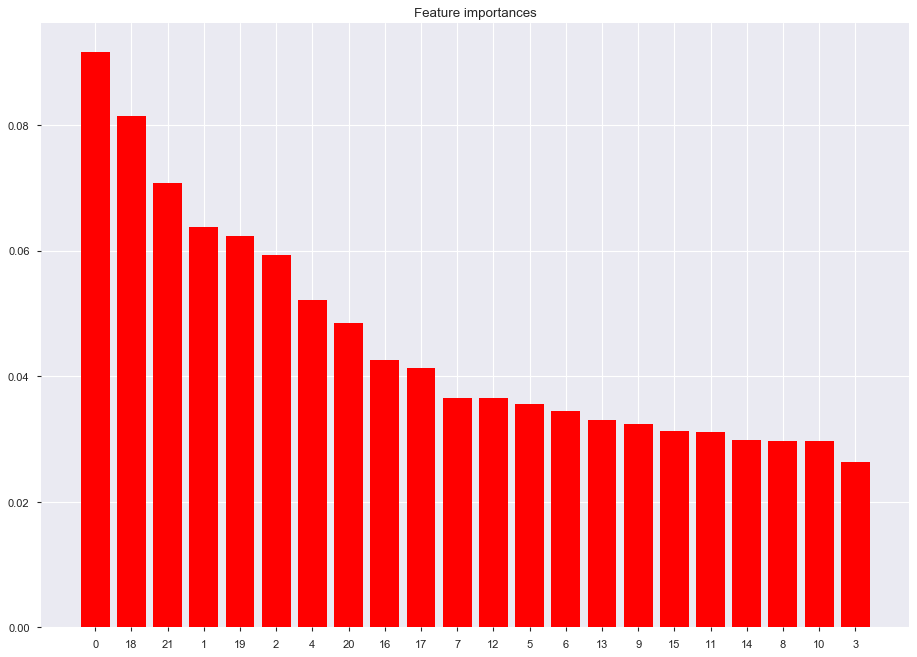

In [79]:
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w')
plt.title("Feature importances")
plt.bar(range(X.shape[1]), etc.feature_importances_[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.show()

# Prediction
 ### Simple algorithms

In [80]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score

### KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
knn = KNeighborsClassifier()
knn.fit(scaledX_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [83]:
print("KNN with k=5 got {}% accuracy on the test set.".format(accuracy_score(Y_test, knn.predict(scaledX_test))*100))

KNN with k=5 got 94.87179487179486% accuracy on the test set.


### KNN Grid search

In [84]:
params_dict = {'n_neighbors':[3, 5, 9, 15], 'p':[1, 2, 3], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
gs = GridSearchCV(knn, param_grid=params_dict, verbose=10, cv=10)

In [85]:
gs.fit(scaledX_train, Y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=1.000, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.938, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.938, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.938, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=1.000, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.875, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algori

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s



[CV] algorithm=auto, n_neighbors=3, p=3 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=3, score=0.875, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=3 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=3, score=0.786, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=3 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=3, score=1.000, total=   0.0s
[CV] algorithm=auto, n_neighbors=5, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=auto, n_neighbors=5, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=5, p=1, score=1.000, total=   0.0s
[CV] algorithm=auto, n_neighbors=5, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=5, p=1, score=0.938, total=   0.0s
[CV] algorithm=auto, n_neighbors=5, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=5, p=1, score=0.938, total=   0.0s
[CV] 

[CV] . algorithm=auto, n_neighbors=15, p=1, score=0.812, total=   0.0s
[CV] algorithm=auto, n_neighbors=15, p=1 .............................
[CV] . algorithm=auto, n_neighbors=15, p=1, score=0.714, total=   0.0s
[CV] algorithm=auto, n_neighbors=15, p=1 .............................
[CV] . algorithm=auto, n_neighbors=15, p=1, score=0.857, total=   0.0s
[CV] algorithm=auto, n_neighbors=15, p=2 .............................
[CV] . algorithm=auto, n_neighbors=15, p=2, score=0.812, total=   0.0s
[CV] algorithm=auto, n_neighbors=15, p=2 .............................
[CV] . algorithm=auto, n_neighbors=15, p=2, score=0.812, total=   0.0s
[CV] algorithm=auto, n_neighbors=15, p=2 .............................
[CV] . algorithm=auto, n_neighbors=15, p=2, score=0.938, total=   0.0s
[CV] algorithm=auto, n_neighbors=15, p=2 .............................
[CV] . algorithm=auto, n_neighbors=15, p=2, score=0.812, total=   0.0s
[CV] algorithm=auto, n_neighbors=15, p=2 .............................
[CV] .

[CV]  algorithm=ball_tree, n_neighbors=5, p=2, score=0.938, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=5, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=5, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=5, p=2, score=0.875, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=5, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=5, p=2, score=0.938, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=5, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=5, p=2, score=0.875, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=5, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=5, p=2, score=0.812, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=5, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=5, p=2, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=5, p=2 ...........

[CV]  algorithm=ball_tree, n_neighbors=15, p=2, score=0.812, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=15, p=2 ........................
[CV]  algorithm=ball_tree, n_neighbors=15, p=2, score=0.812, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=15, p=2 ........................
[CV]  algorithm=ball_tree, n_neighbors=15, p=2, score=0.938, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=15, p=2 ........................
[CV]  algorithm=ball_tree, n_neighbors=15, p=2, score=0.812, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=15, p=2 ........................
[CV]  algorithm=ball_tree, n_neighbors=15, p=2, score=0.875, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=15, p=2 ........................
[CV]  algorithm=ball_tree, n_neighbors=15, p=2, score=0.812, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=15, p=2 ........................
[CV]  algorithm=ball_tree, n_neighbors=15, p=2, score=0.938, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=15, p=2 ...

[CV]  algorithm=kd_tree, n_neighbors=5, p=3, score=0.812, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=5, p=3 ...........................
[CV]  algorithm=kd_tree, n_neighbors=5, p=3, score=0.812, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=5, p=3 ...........................
[CV]  algorithm=kd_tree, n_neighbors=5, p=3, score=0.875, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=5, p=3 ...........................
[CV]  algorithm=kd_tree, n_neighbors=5, p=3, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=5, p=3 ...........................
[CV]  algorithm=kd_tree, n_neighbors=5, p=3, score=0.812, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=5, p=3 ...........................
[CV]  algorithm=kd_tree, n_neighbors=5, p=3, score=0.786, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=5, p=3 ...........................
[CV]  algorithm=kd_tree, n_neighbors=5, p=3, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=9, p=1 ...........................

[CV]  algorithm=kd_tree, n_neighbors=15, p=3, score=0.875, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=15, p=3 ..........................
[CV]  algorithm=kd_tree, n_neighbors=15, p=3, score=0.688, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=15, p=3 ..........................
[CV]  algorithm=kd_tree, n_neighbors=15, p=3, score=0.857, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=15, p=3 ..........................
[CV]  algorithm=kd_tree, n_neighbors=15, p=3, score=0.857, total=   0.0s
[CV] algorithm=brute, n_neighbors=3, p=1 .............................
[CV] . algorithm=brute, n_neighbors=3, p=1, score=1.000, total=   0.0s
[CV] algorithm=brute, n_neighbors=3, p=1 .............................
[CV] . algorithm=brute, n_neighbors=3, p=1, score=0.938, total=   0.0s
[CV] algorithm=brute, n_neighbors=3, p=1 .............................
[CV] . algorithm=brute, n_neighbors=3, p=1, score=0.938, total=   0.0s
[CV] algorithm=brute, n_neighbors=3, p=1 ............................

[CV] . algorithm=brute, n_neighbors=5, p=3, score=0.875, total=   0.0s
[CV] algorithm=brute, n_neighbors=5, p=3 .............................
[CV] . algorithm=brute, n_neighbors=5, p=3, score=1.000, total=   0.0s
[CV] algorithm=brute, n_neighbors=5, p=3 .............................
[CV] . algorithm=brute, n_neighbors=5, p=3, score=0.812, total=   0.0s
[CV] algorithm=brute, n_neighbors=5, p=3 .............................
[CV] . algorithm=brute, n_neighbors=5, p=3, score=0.786, total=   0.0s
[CV] algorithm=brute, n_neighbors=5, p=3 .............................
[CV] . algorithm=brute, n_neighbors=5, p=3, score=1.000, total=   0.0s
[CV] algorithm=brute, n_neighbors=9, p=1 .............................
[CV] . algorithm=brute, n_neighbors=9, p=1, score=0.938, total=   0.0s
[CV] algorithm=brute, n_neighbors=9, p=1 .............................
[CV] . algorithm=brute, n_neighbors=9, p=1, score=0.812, total=   0.0s
[CV] algorithm=brute, n_neighbors=9, p=1 .............................
[CV] .

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:    2.6s finished
C:\Users\anku\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 9, 15], 'p': [1, 2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

In [86]:
print(gs.best_estimator_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='uniform')


In [87]:
new_knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=1,
           weights='uniform')
new_knn.fit(scaledX_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=3, p=1,
                     weights='uniform')

In [88]:
print("KNN - fine tuned, got {}% accuracy on the test set.".format(accuracy_score(Y_test, new_knn.predict(scaledX_test))*100))

KNN - fine tuned, got 92.3076923076923% accuracy on the test set.


### Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
lr = LogisticRegression()
lr.fit(scaledX_train, Y_train)

C:\Users\anku\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
print("Logistic regression - default, got {}% accuracy on the test set.".format(accuracy_score(Y_test, lr.predict(scaledX_test))*100))

Logistic regression - default, got 84.61538461538461% accuracy on the test set.


In [92]:
lr_tuned = LogisticRegression(C=1000, penalty='l2')
lr_tuned.fit(scaledX_train, Y_train)

C:\Users\anku\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
print("Logistic regression - tuned, got {}% accuracy on the test set.".format(accuracy_score(Y_test, lr_tuned.predict(scaledX_test))*100))


Logistic regression - tuned, got 76.92307692307693% accuracy on the test set.


# Tree and forest classifiers

### Tree Classifier

non scaled train and test sample are used for this so xtrain and y train will be used instead of scaledX_train

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn import metrics 

In [102]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' ,random_state=0,max_depth=5)
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [106]:
print("Decision tree classifier, got {}% accuracy on the test set.".format(accuracy_score(Y_test, dt_model.predict(X_test))*100))

Decision tree classifier, got 84.61538461538461% accuracy on the test set.


In [108]:
cr=metrics.classification_report(Y_test,dt_model.predict(X_test))
print(cr)

              precision    recall  f1-score   support

           0       0.62      1.00      0.77        10
           1       1.00      0.79      0.88        29

    accuracy                           0.85        39
   macro avg       0.81      0.90      0.83        39
weighted avg       0.90      0.85      0.86        39



In [110]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,dt_model.predict(X_test))
print(cm)

[[10  0]
 [ 6 23]]


In [111]:
from sklearn.model_selection import GridSearchCV
parameter={'max_depth':np.arange(1,10),'min_samples_leaf':np.arange(1,10)}
GS=GridSearchCV(dt_model,parameter,cv=3)
GS.fit(X,Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5

In [112]:
GS.best_params_

{'max_depth': 7, 'min_samples_leaf': 1}

In [113]:
dt_model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, min_samples_leaf=4)
dt_model2.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [114]:
print("Decision tree classifier, got {}% accuracy on the test set.".format(accuracy_score(Y_test, dt_model2.predict(X_test))*100))

Decision tree classifier, got 87.17948717948718% accuracy on the test set.


### Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
rfc = RandomForestClassifier(n_estimators=350)
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [117]:
print("Random forest classifier, got {}% accuracy on the test set.".format(accuracy_score(Y_test, rfc.predict(X_test))*100))

Random forest classifier, got 94.87179487179486% accuracy on the test set.


# Summary

In this task as we can see the best overall performance (accuracy) on the test set is given by RandomForest and KNN classifier which is about 93 percent. Right behind it is Decision tree Classifier with accuracy of 89 percent and logistic regression is not a good model for this.